<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_632528291_1_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.005)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 632528291
period = 1.73014961595188  # Orbital period in days
epoch = 2116.6566109733
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.12]
folded_lc = folded_lc[folded_lc.time > -0.12]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_632528291_all_sector_lightcurve.csv


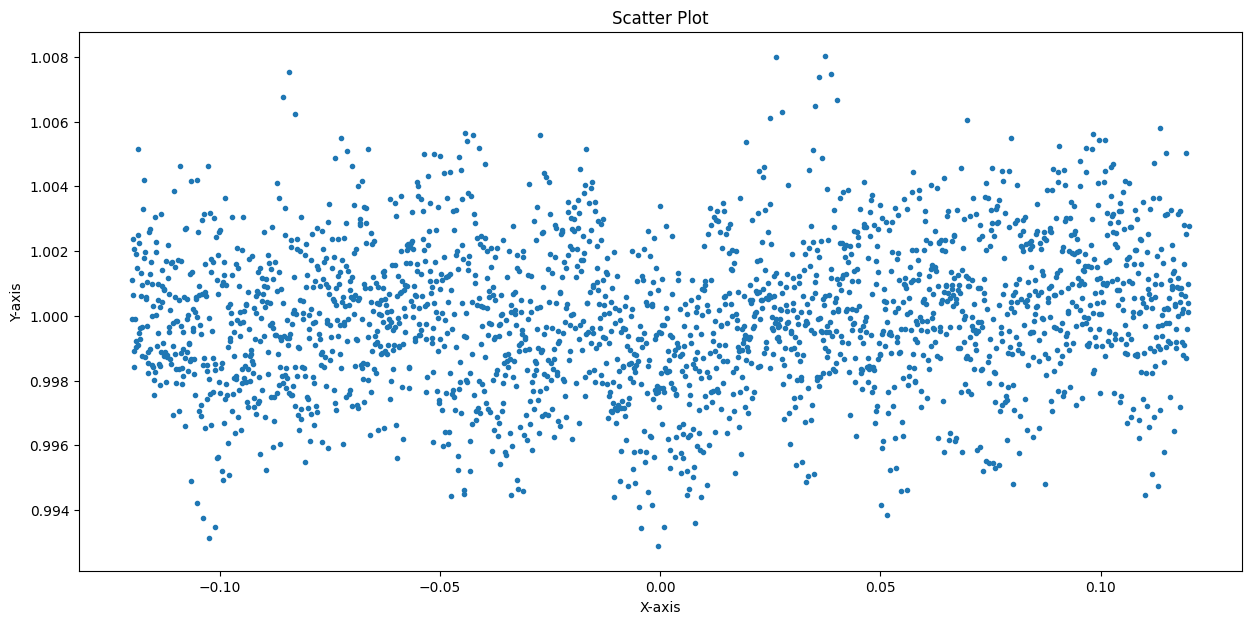

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([30])
target = tr.target(ID=ID, sectors=sectors, search_radius=8) # target radius shorted

In [7]:
ap_30 = np.array([[1539.0, 376.0], [1539.0, 377.0], [1540.0, 376.0], [1540.0, 377.0],
      [1540.0, 378.0], [1541.0, 375.0], [1541.0, 376.0], [1541.0, 377.0], [1541.0,
        378.0], [1541.0, 379.0], [1542.0, 375.0], [1542.0, 376.0], [1542.0, 377.0],
      [1542.0, 378.0], [1542.0, 379.0], [1543.0, 375.0], [1543.0, 376.0], [1543.0,
        377.0], [1543.0, 378.0], [1543.0, 379.0], [1544.0, 375.0], [1544.0, 376.0],
      [1544.0, 377.0], [1544.0, 378.0]])

apertures = np.array([ap_30])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

Sector 30


ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x7dda454920e0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 1300x550 with 4 Axes>

In [8]:
# Adding parameters per SHERLOCKPIPE
target.update_star(ID=632528291, param='mass', value=0.1)
target.update_star(ID=632528291, param='rad', value=0.1)

In [9]:
tdepth = 1.5946 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,632528291,11.0750,NaN,NaN,NaN,32.295422,-16.339591,0.100000,0.100000,3953.0,35.094300,0.000,0.000,1.516330e-01,0.010516
1,290172418,9.2060,8.076,7.412,7.246,32.295422,-16.339591,0.601308,0.616452,NaN,35.094300,0.000,0.000,8.479960e-01,0.001880
2,290172424,17.8700,16.979,16.444,15.571,32.294950,-16.359306,NaN,NaN,NaN,NaN,70.992,181.316,1.048468e-05,0.000000
3,290172414,15.9690,15.073,14.695,14.599,32.295122,-16.319754,0.840000,0.729586,5042.0,0.774916,71.422,359.168,3.373999e-04,0.000000
4,632528290,19.7607,NaN,NaN,NaN,32.310608,-16.355208,NaN,NaN,NaN,-0.245407,76.896,136.983,7.420087e-07,0.000000
5,290172416,17.9791,16.176,15.794,15.569,32.272281,-16.331272,0.510000,0.516585,3601.0,0.854696,85.371,290.533,2.226807e-06,0.000000
6,632528289,18.8777,NaN,NaN,NaN,32.304744,-16.362084,NaN,NaN,NaN,0.153866,87.140,158.314,1.394144e-07,0.000000
7,632528292,19.4656,NaN,NaN,NaN,32.269566,-16.344252,NaN,NaN,4454.0,0.687130,90.882,259.358,1.128995e-06,0.000000
8,290172417,14.0446,13.180,12.705,12.627,32.324225,-16.338090,0.810000,0.773914,4944.0,1.928620,99.650,86.896,1.884705e-05,0.000000
9,290172413,17.0839,15.625,15.119,14.993,32.273121,-16.314198,0.225725,0.254479,3324.0,3.195760,119.553,319.872,3.985828e-09,0.000000


In [17]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/120
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 632528291.
Calculating EB and EBx2P scenario probabilities for 632528291.
Calculating PTP scenario probability for 632528291.
Calculating PEB and PEBx2P scenario probabilities for 632528291.
Calculating STP scenario probability for 632528291.
Calculating SEB and SEBx2P scenario probabilities for 632528291.
Calculating DTP scenario probability for 632528291.
Calculating DEB and DEBx2P scenario probabilities for 632528291.
Calculating BTP scenario probability for 632528291.
Calculating BEB and BEBx2P scenario probabilities for 632528291.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 290172418.
CPU times: user 1min 48s, sys: 1.18 s, total: 1min 49s
Wall time: 1min 21s


In [18]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.89210189
NFPP = 0.87918272


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,632528291,TP,0.100000,0.100000,1.730150,89.660246,0.159795,2.238996e-01,181.976932,1.080332,0.000000,0.000000,0.083798
1,632528291,EB,0.100000,0.100000,1.730150,63.638306,24.047522,5.707429e-01,258.073154,0.000000,0.100000,0.100000,0.000000
2,632528291,EBx2P,0.100000,0.100000,3.460299,88.801348,0.674914,5.929892e-01,167.193307,0.000000,0.100000,0.100000,0.000835
3,632528291,PTP,0.100000,0.100000,1.730150,89.923681,0.039746,2.065708e-01,207.950932,1.555858,0.000000,0.000000,0.011784
4,632528291,PEB,0.100000,0.100000,1.730150,73.990953,10.043211,6.304792e-01,319.052842,0.000000,0.100000,0.100000,0.000000
5,632528291,PEBx2P,0.100000,0.100000,3.460299,88.635238,1.036650,6.974783e-01,208.773380,0.000000,0.100000,0.100000,0.000385
6,632528291,STP,0.100000,0.100000,1.730150,89.909623,0.031909,3.299688e-01,133.316540,1.543941,0.000000,0.000000,0.011370
7,632528291,SEB,0.100000,0.100000,1.730150,85.443016,2.731675,6.105369e-02,27.022319,0.000000,0.100000,0.100000,0.000000
8,632528291,SEBx2P,0.100000,0.100000,3.460299,88.476996,0.914590,7.939428e-01,209.851446,0.000000,0.100000,0.100000,0.000000
9,632528291,DTP,0.100000,0.100000,1.730150,89.653845,0.170490,2.095747e-01,192.750270,1.092769,0.000000,0.000000,0.012316


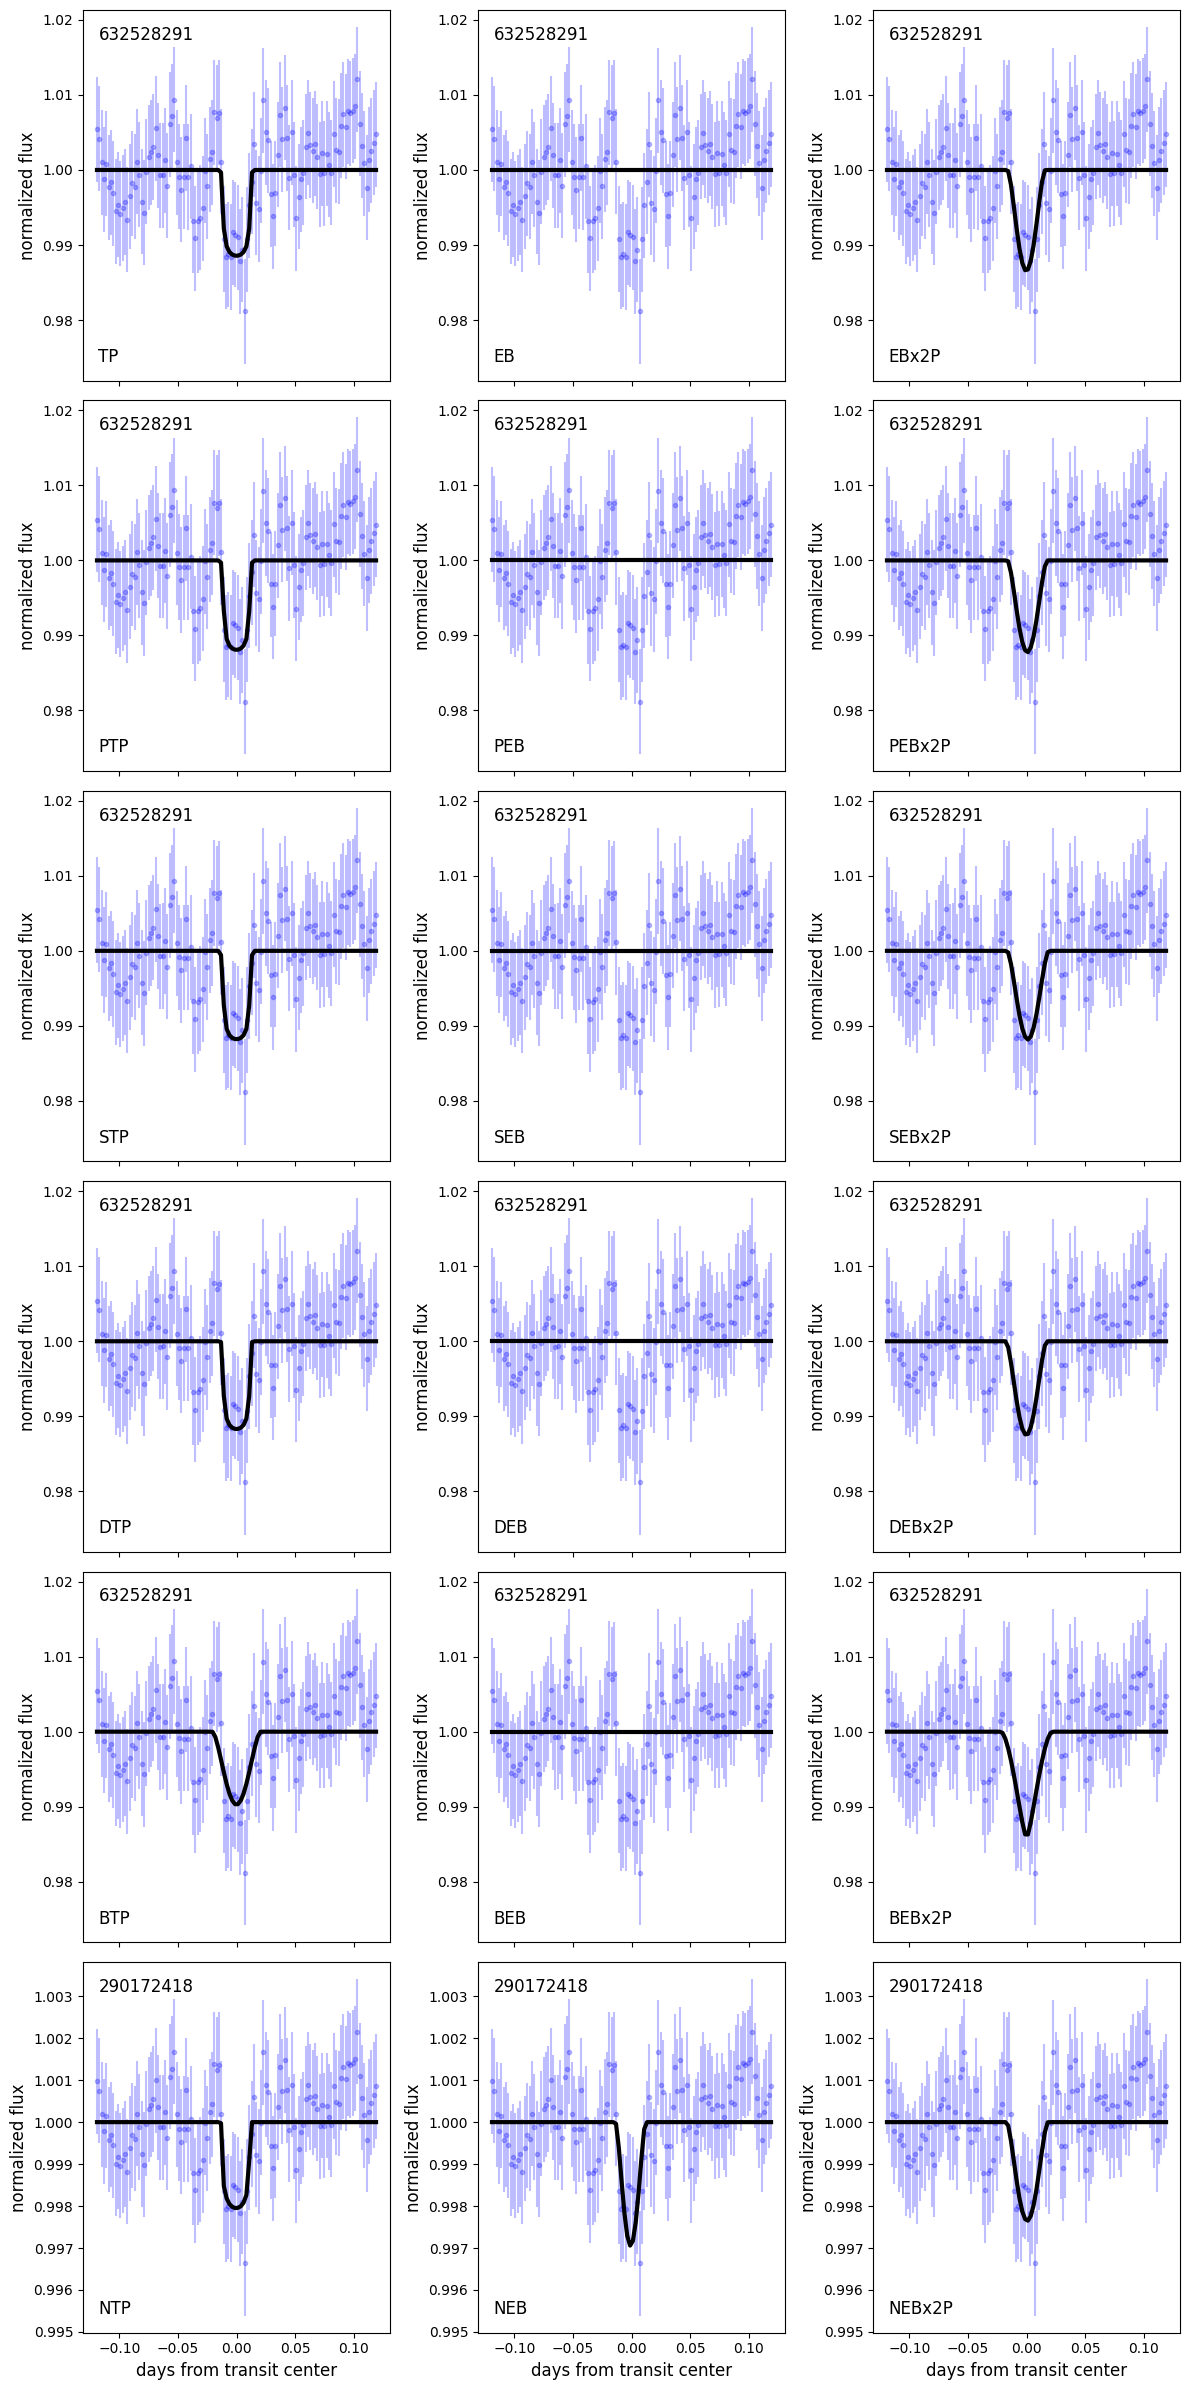

In [19]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [20]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.8940899851837114 +/- 0.0022445085437029976
NFPP = 0.8805342973120143 +/- 0.0023397380514765965
CPU times: user 34min 29s, sys: 28.6 s, total: 34min 58s
Wall time: 24min 7s


Our final conclusion about this specified planet of TIC 632528291 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).